# TP 2
# Apprentissage de réseaux de neurones pour la classification
## Wahabi Mohamed 
## Classe -42-


## 1.	Réseau mono-couche pour la classification

### a)	Charger la distribution de données dataset. Préciser le nombre d’observations, leurs dimensions et le nombre de classes. Séparer les données en bases d’apprentissage et de test avec un ratio de 70/30. Afficher les données.


In [ ]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import mkl, multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier 
from sklearn.pipeline import make_pipeline
data_array = np.loadtxt('./dataset1.dat')
mkl.set_num_threads((2 * multiprocessing.cpu_count()) + 1);

In [5]:
def contour_plot(X, Y, X_train, y_train, classifier):
    colors = np.array([x for x in 'rgbcmyk'])
    X_min, X_max = X[:, 0].min() * 1.1, X[:, 0].max() * 1.1
    Y_min, Y_max = X[:, 1].min() * 1.1, X[:, 1].max() * 1.1
    X_h = (X_max - X_min)/50
    Y_h = (Y_max - Y_min)/50
    XX, YY = np.meshgrid(np.arange(X_min, X_max, X_h),
                        np.arange(Y_min, Y_max, Y_h))
    Y = classifier.predict(np.c_[XX.ravel(), YY.ravel()])
    Y = Y.reshape(XX.shape)

    plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.show()

In [6]:
print("Nombre d'observations: {}".format(data_array.shape[0]))
print("Dimensions: {}".format(data_array.shape[1]))
print("Nombre de classes: {}".format(int(np.max(data_array[:,2])+1)))

Nombre d'observations: 300
Dimensions: 3
Nombre de classes: 3


In [7]:
X = data_array[:,:2]
y = data_array[:, 2].astype(int)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [9]:
print(pd.DataFrame(data_array))

             0          1    2
0    -1.436722   7.165359  1.0
1     3.093779   1.161074  1.0
2   -10.494875  -8.285385  0.0
3     2.164907   2.196077  1.0
4   -11.174417 -10.173119  0.0
..         ...        ...  ...
295   3.146458   6.777524  1.0
296  -8.924254  -6.393839  0.0
297   0.230048  11.635289  1.0
298  -6.391747  -0.835525  0.0
299 -12.862147  -8.555566  0.0

[300 rows x 3 columns]


### b)	Définir un réseau de neurones classifieur mono-couche : 

clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant', verbose=1)

A représente le pas d’apprentissage et B le nombre d’itérations, que vous saisirez avant de définir le réseau.
Préciser le nombre de paramètres libres (poids et biais) du réseau.


### c)Entraîner ce réseau (fonction fit) en utilisant successivement les paramètres suivants :
- clf1: A = 0.000001 et B = 1
- clf2: A = 1 et B = 1
- clf3: A = 0.000001 et B = 10
- clf4: A = 1 et B = 10

In [23]:
print(f"Pour notre réseau de neurone classifieur mono-couche, nous avons {(X.shape[1]+1)*(np.max(y)+1)} paramètres libres dans notre matrice de poids, soit 6 poids et 3 biais.")

Pour notre réseau de neurone classifieur mono-couche, nous avons 9 paramètres libres dans notre matrice de poids, soit 6 poids et 3 biais.


---clf1---
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
clf1 train score: 0.9095238095238095 Exemples mal classés: 19.0
clf1 test score: 0.8888888888888888 Exemples mal classés: 10.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


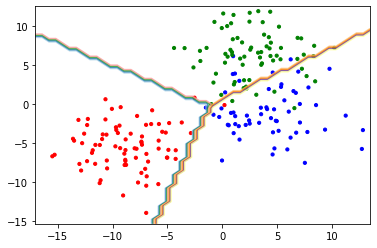


---clf2---
-- Epoch 1
Norm: 2.74, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.016594
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.75, NNZs: 2, Bias: -1.000000, T: 210, Avg. loss: 0.135506
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.14, NNZs: 2, Bias: -1.000000, T: 210, Avg. loss: 0.254956
Total training time: 0.00 seconds.
clf2 train score: 0.9142857142857143 Exemples mal classés: 18.0
clf2 test score: 0.8666666666666667 Exemples mal classés: 12.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


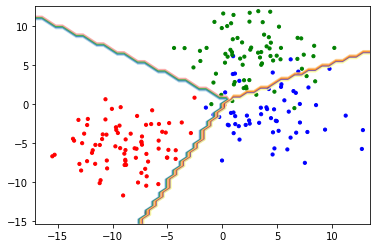

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished



---clf3---
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: 0.000000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 1050, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2, Bias: 0.000000, T: 1260, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: -0.000001

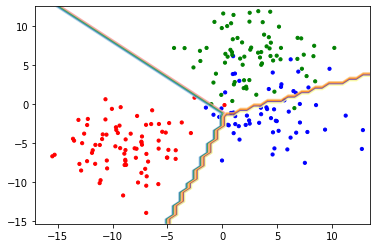

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



---clf4---
-- Epoch 1
Norm: 2.74, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.016594
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.02, NNZs: 2, Bias: -1.000000, T: 420, Avg. loss: 0.008259
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.84, NNZs: 2, Bias: 0.000000, T: 630, Avg. loss: 0.011535
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.40, NNZs: 2, Bias: -2.000000, T: 840, Avg. loss: 0.014278
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.81, NNZs: 2, Bias: -1.000000, T: 1050, Avg. loss: 0.016927
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.45, NNZs: 2, Bias: 0.000000, T: 1260, Avg. loss: 0.018288
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.24, NNZs: 2, Bias: -2.000000, T: 1470, Avg. loss: 0.017451
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
-- Epoch 1
Norm: 2.75, NNZs: 2, Bias: -1.000000, T: 210, Avg. loss: 0.135506
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.00, NNZs: 2, Bias: -1.000000

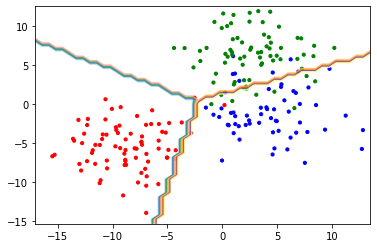

In [24]:
print('---clf1---')
clf1=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=0.000001, max_iter=1, learning_rate='constant', verbose=1, random_state=42))
clf1.fit(X_train, y_train)
print('clf1 train score:', clf1.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf1.score(X_train, y_train)*len(X_train))
print('clf1 test score:', clf1.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf1.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf1)

print('\n---clf2---')
clf2=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=1, max_iter=1, learning_rate='constant', verbose=1, random_state=42))
clf2.fit(X_train, y_train)
print('clf2 train score:', clf2.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf2.score(X_train, y_train)*len(X_train))
print('clf2 test score:', clf2.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf2.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf2)

print('\n---clf3---')
clf3=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=0.000001, max_iter=10, learning_rate='constant', verbose=1, random_state=42))
clf3.fit(X_train, y_train)
print('clf3 train score:', clf3.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf3.score(X_train, y_train)*len(X_train))
print('clf3 test score:', clf3.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf3.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf3)

print('\n---clf4---')
clf4=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=1, max_iter=10, learning_rate='constant', verbose=1, random_state=42))
clf4.fit(X_train, y_train)
print('clf4 train score:', clf4.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf4.score(X_train, y_train)*len(X_train))
print('clf4 test score:', clf4.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf4.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf4)


#### La comparaison pourra se faire sur plusieurs points. 
- le taux de reconnaissance (fonction score) en apprentissage et en test, obtenu en utilisant la règle de décision WTA (Winner Takes All).
- la forme des frontières entre les classes.

On remarque que le taux de reconnaissance (accuracy) du SGDClassifier n'atteint jamais 1 mais reste aux alentours de 0.9 car les données sont non linéairements séparables. 

En comparant les 4 classfieurs comportant des paramètres de pas et de max itérations différents: 
- on remarque que le classifier clf1 ne réussi pas à classer 19 exemples pour la base d'entrainement et 10 exemples pour la base de test.
- on remarque que le classifier clf2 ne réussi pas à classer 18 exemples pour la base d'entrainement et 12 exemples pour la base de test.
- on remarque que le classifier clf3 ne réussi pas à classer 23 exemples pour la base d'entrainement et 18 exemples pour la base de test.
- on remarque que le classifier clf4 ne réussi pas à classer 20 exemples pour la base d'entrainement et 10 exemples pour la base de test.

On peut donc en conclure que clf3 (pas: 0.000001, max_iter: 10) est le moins bon parmi les classifieurs.

Le meilleur classifieur est clf1 (pas: 0.000001, max_iter: 1) car la somme des exemples mal classé en entrainement et en test est inférieur à celle des autres (19+10=29 < 18+12=30 <= 20+10=30 < 23+18=41). ### Réseau multi-couche pour la classification


#### Conclure sur l’impact de ces paramètres (ou tenter d’expliquer leur absence d’impact).

Concernant l'impact des paramètres, on peut dire que le classifieur est plus optimal **lorsque le pas est très petit (0.000001)** et que **le nombre maximum d'itérations est faible (1)** ou alors d'avoir **un plus grand pas (1)** et d'avoir **un nombre plus élevé d'itérations (10)**. 

#### Les résultats précédents varient-ils lorsque l’on relance plusieurs fois le même apprentissage ? Pourquoi ?


Dans le cas où le **random_state = 42** n'est pas défini, on obtient en effet des résultats différents car le **biais W(0)** est initialisé **aléatoirement** et par le fait que **l'on tire au hasard un exemple de la base d'apprentissage**. ainsi, si les classifieurs ont la même graine d'aléatoire (=42), ils choisiront toujours le même exemple 'aléatoirement' et initialiseront le biais de la même façon. 

#### Que doit-on envisager pour améliorer les performances ? Justifier votre réponse.

Afin d'améliorer les performances, il faut pouvoir rendre les données linéairement séparables, et pour se faire, nous aurons besoin d'ajouter une couche de neurone cachée (hidden layer) à notre réseau de neurone. 
ou chercher trouver une variable ressort qui autorise les erreurs de classification.  

## 2.	Réseau multi-couche pour la classification

On travaille sur les mêmes données.

### a)	Définir un réseau de neurones classifieur multi-couche : 

clf2 = MLPClassifier(hidden_layer_sizes=5, activation=’tanh’, solver='adam', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
print('---clf1m C=5---')
clf1m=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', 
                                                    batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42))

clf1m.fit(X_train, y_train)
print('Coût (loss):', clf1m[1].loss_, '\nNombre d\'itérations:', clf1m[1].n_iter_)

---clf1m C=5---
Coût (loss): 0.22640988786246286 
Nombre d'itérations: 100


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### b)	Sensibilité aux hyper-paramètres :

Pour C = 5 :

-	Noter la valeur du coût (loss) en fin d’apprentissage et le nombre d’itérations effectuées 
-	Multiplier le pas d’apprentissage par 10 et noter les valeurs précédentes 
-	Changer le solver (utiliser ‘adam’ au lieu de ‘sgd’) et noter les valeurs précédentes 
-	Conclure sur les meilleurs paramètres à utiliser.

In [27]:
print("---pas d\'apprentissage par 10---'")

clf1m10=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10.fit(X_train, y_train)
print('Coût (loss):', clf1m10[1].loss_, '\nNombre d\'itérations:', clf1m10[1].n_iter_)

---pas d'apprentissage par 10---'
Coût (loss): 0.20627657179791012 
Nombre d'itérations: 63


In [28]:
print("---pas d\'apprentissage par 10---'")

clf1m10=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10.fit(X_train, y_train)
print('Coût (loss):', clf1m10[1].loss_, '\nNombre d\'itérations:', clf1m10[1].n_iter_)

---pas d'apprentissage par 10---'
Coût (loss): 0.20627657179791012 
Nombre d'itérations: 63


In [29]:
print("---pas d\'apprentissage par 10 adam---'")

clf1m10a=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10a.fit(X_train, y_train)
print('Coût (loss):', clf1m10a[1].loss_, '\nNombre d\'itérations:', clf1m10a[1].n_iter_)

---pas d'apprentissage par 10 adam---'
Coût (loss): 0.21182213364524716 
Nombre d'itérations: 24


#### Remarque: 
- **sgd** équivaut à une descente de gradient stochastique.
- **adam** équivaut à une optimisation du gradient stochastique proposé par Kingma, Diederik, et Jimmy Ba

**Les meilleurs paramètres à utiliser:** 
- un pas d'apprentissage à **10<sup>-2</sup>**
- un solver **'adam'**

### c)	Trouver, par recherche exhaustive, le nombre optimal de neurones cachés C<sup>*</sup>. pour ce faire, tester les valeurs de C suivantes : 
### 1, 2, 5, 10, 20, 50, 100.

Pour chaque valeur de C, répéter 10 fois l’apprentissage et le test. Calculer les moyennes et écart-type des taux en apprentissage et en test. 

Reporter ces résultats dans un tableau, en précisant pour chaque architecture, le nombre de paramètres libres du réseau. Analyser et conclure quant au biais et à la variance. 


In [31]:
architectures = []
classifier_array = []
for i, c in enumerate([1, 2, 5, 10, 20, 50, 100]):
    Ccdille=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(c), activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, learning_rate_init=0.01))
    accuracies = []

    for i in range(10):
        Ccdille.fit(X_train, y_train)
        accuracies.append(Ccdille.score(X_train, y_train))

    architectures.append((
        ((X.shape[1]+1)*c) + (c+1)*(np.max(y)+1),
        (np.max(y)+1)+c, 
        np.mean(accuracies),
        np.var(accuracies)
    ))

    classifier_array.append(Ccdille)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


       paramètres libres  biais   moyenne  variance  accuracy Train set  \
c=1                  9.0    4.0  0.840952  0.002364            0.866667   
c=2                 15.0    5.0  0.913333  0.000044            0.914286   
c=5                 33.0    8.0  0.917619  0.000037            0.919048   
c=10                63.0   13.0  0.917619  0.000136            0.909524   
c=20               123.0   23.0  0.918571  0.000038            0.909524   
c=50               303.0   53.0  0.915238  0.000103            0.914286   
c=100              603.0  103.0  0.912381  0.000060            0.914286   

       accuracy Test set  
c=1             0.755556  
c=2             0.866667  
c=5             0.900000  
c=10            0.911111  
c=20            0.933333  
c=50            0.822222  
c=100           0.922222  
Le nombre optimal de neurone cachés dans le hidden layer est de c= 20 pour un nombre d'examples mal classés de: 25.0 (au total X_train + X_test)


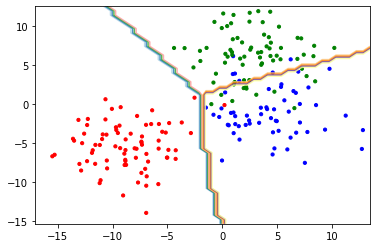

In [19]:
scores = []
bestHiddenLayerSize = 0
minimumBadClassified = -1
xtrlen = len(X_train)
xtelen = len(X_test)
bestindex = -1

for i, c in enumerate([1, 2, 5, 10, 20, 50, 100]):
    a = classifier_array[i].score(X_train, y_train)
    b = classifier_array[i].score(X_test, y_test)
    temp = (xtrlen - xtrlen*a) + (xtelen - xtelen*b)
    
    if minimumBadClassified == -1 or minimumBadClassified > temp:
        minimumBadClassified = temp
        bestHiddenLayerSize = c
        bestindex = i

    scores.append((
        classifier_array[i].score(X_train, y_train),
        classifier_array[i].score(X_test, y_test)
    ))

df = pd.DataFrame(np.array(architectures))
df.columns = ['paramètres libres', 'biais', 'moyenne', 'variance']
dfscore = pd.DataFrame(np.array(scores))
dfscore.columns = ['accuracy Train set', 'accuracy Test set']
dfconcat = pd.concat([df, dfscore], axis=1)
dfconcat.rename(index={0:'c=1', 1:'c=2', 2:'c=5', 3:'c=10', 4:'c=20', 5:'c=50', 6:'c=100'}, inplace=True)
print(dfconcat)

print('Le nombre optimal de neurone cachés dans le hidden layer est de c=', bestHiddenLayerSize, 'pour un nombre d\'examples mal classés de:', minimumBadClassified, '(au total X_train + X_test)')

contour_plot(X, y, X_train, y_train, classifier_array[bestindex])

### Dataset2


In [32]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import mkl, multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier 
from sklearn.pipeline import make_pipeline
data_array1 = np.loadtxt('./dataset2.txt')
mkl.set_num_threads((2 * multiprocessing.cpu_count()) + 1);

In [36]:
X = data_array1[:,:2]
y = data_array1[:, 2].astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [38]:
print(pd.DataFrame(data_array1))

            0         1    2
0   -0.208829  0.136592  1.0
1   -0.425751 -0.054918  1.0
2   -0.247043  0.270194  1.0
3    0.046033 -0.053979  1.0
4   -0.170775  0.555692  1.0
..        ...       ...  ...
695  0.044518 -0.416129  4.0
696  0.149435 -0.292733  4.0
697  0.194124 -0.378072  4.0
698  0.260869 -0.277765  4.0
699  0.324631 -0.224242  4.0

[700 rows x 3 columns]


---clf1---
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000004, T: 489, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 489, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 489, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 489, Avg. loss: 0.000000
Total training time: 0.00 seconds.
clf1 train score: 0.4703476482617587 Exemples mal classés: 259.0
clf1 test score: 0.49523809523809526 Exemples mal classés: 106.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


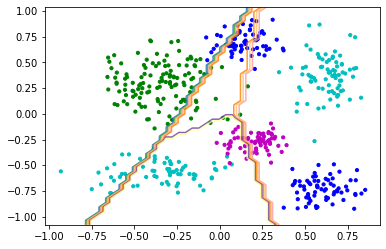


---clf2---
-- Epoch 1
Norm: 4.10, NNZs: 2, Bias: -5.000000, T: 489, Avg. loss: 0.189936
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.33, NNZs: 2, Bias: 0.000000, T: 489, Avg. loss: 0.436577
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.99, NNZs: 2, Bias: -1.000000, T: 489, Avg. loss: 0.617444
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.60, NNZs: 2, Bias: -1.000000, T: 489, Avg. loss: 0.333453
Total training time: 0.00 seconds.
clf2 train score: 0.26993865030674846 Exemples mal classés: 357.0
clf2 test score: 0.3238095238095238 Exemples mal classés: 142.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


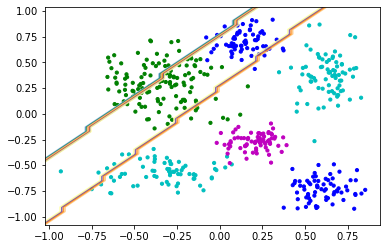

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished



---clf3---
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000004, T: 489, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: -0.000004, T: 978, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: -0.000005, T: 1467, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2, Bias: -0.000003, T: 1956, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2, Bias: -0.000004, T: 2445, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2, Bias: -0.000003, T: 2934, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 489, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: -0.000001, T: 978, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: -0.00

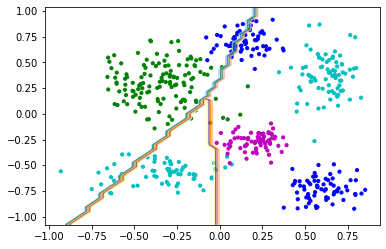

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished



---clf4---
-- Epoch 1
Norm: 4.10, NNZs: 2, Bias: -5.000000, T: 489, Avg. loss: 0.189936
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.92, NNZs: 2, Bias: -4.000000, T: 978, Avg. loss: 0.170012
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.78, NNZs: 2, Bias: -6.000000, T: 1467, Avg. loss: 0.171371
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.17, NNZs: 2, Bias: -4.000000, T: 1956, Avg. loss: 0.192353
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.57, NNZs: 2, Bias: -3.000000, T: 2445, Avg. loss: 0.189999
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.18, NNZs: 2, Bias: -3.000000, T: 2934, Avg. loss: 0.182263
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.13, NNZs: 2, Bias: -3.000000, T: 3423, Avg. loss: 0.178845
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
-- Epoch 1
Norm: 1.33, NNZs: 2, Bias: 0.000000, T: 489, Avg. loss: 0.436577
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.66, NNZs: 2, Bias: -2.00

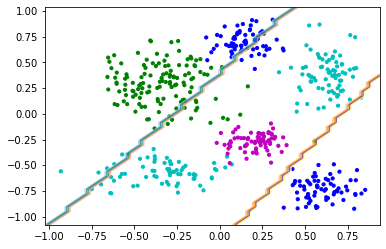

In [40]:
print('---clf1---')
clf_1=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=0.000001, max_iter=1, learning_rate='constant', verbose=1, random_state=42))
clf_1.fit(X_train, y_train)
print('clf1 train score:', clf1.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf1.score(X_train, y_train)*len(X_train))
print('clf1 test score:', clf1.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf1.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf1)

print('\n---clf2---')
clf_2=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=1, max_iter=1, learning_rate='constant', verbose=1, random_state=42))
clf_2.fit(X_train, y_train)
print('clf2 train score:', clf2.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf2.score(X_train, y_train)*len(X_train))
print('clf2 test score:', clf2.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf2.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf2)

print('\n---clf3---')
clf_3=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=0.000001, max_iter=10, learning_rate='constant', verbose=1, random_state=42))
clf_3.fit(X_train, y_train)
print('clf3 train score:', clf3.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf3.score(X_train, y_train)*len(X_train))
print('clf3 test score:', clf3.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf3.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf3)

print('\n---clf4---')
clf_4=make_pipeline(StandardScaler(), SGDClassifier(loss='perceptron', eta0=1, max_iter=10, learning_rate='constant', verbose=1, random_state=42))
clf_4.fit(X_train, y_train)
print('clf4 train score:', clf4.score(X_train, y_train), 'Exemples mal classés:', len(X_train)-clf4.score(X_train, y_train)*len(X_train))
print('clf4 test score:', clf4.score(X_test, y_test), 'Exemples mal classés:', len(X_test)-clf4.score(X_test, y_test)*len(X_test))
contour_plot(X, y, X_train, y_train, clf4)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
print('---clf1m C=5---')
clf1m=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', 
                                                    batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42))

clf1m.fit(X_train, y_train)
print('Coût (loss):', clf1m[1].loss_, '\nNombre d\'itérations:', clf1m[1].n_iter_)

---clf1m C=5---
Coût (loss): 0.3706653206359609 
Nombre d'itérations: 100


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Pour C = 5 :

-	Noter la valeur du coût (loss) en fin d’apprentissage et le nombre d’itérations effectuées 
-	Multiplier le pas d’apprentissage par 10 et noter les valeurs précédentes 
-	Changer le solver (utiliser ‘adam’ au lieu de ‘sgd’) et noter les valeurs précédentes 
-	Conclure sur les meilleurs paramètres à utiliser.

In [42]:
print("---pas d\'apprentissage par 10---'")

clf1m10=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10.fit(X_train, y_train)
print('Coût (loss):', clf1m10[1].loss_, '\nNombre d\'itérations:', clf1m10[1].n_iter_)

---pas d'apprentissage par 10---'
Coût (loss): 0.06647487787593047 
Nombre d'itérations: 100


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
print("---pas d\'apprentissage par 10---'")

clf1m10=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10.fit(X_train, y_train)
print('Coût (loss):', clf1m10[1].loss_, '\nNombre d\'itérations:', clf1m10[1].n_iter_)

---pas d'apprentissage par 10---'
Coût (loss): 0.06647487787593047 
Nombre d'itérations: 100


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
print("---pas d\'apprentissage par 10 adam---'")

clf1m10a=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0, random_state=42, learning_rate_init=0.01))

clf1m10a.fit(X_train, y_train)
print('Coût (loss):', clf1m10a[1].loss_, '\nNombre d\'itérations:', clf1m10a[1].n_iter_)

---pas d'apprentissage par 10 adam---'
Coût (loss): 0.029492470662004715 
Nombre d'itérations: 99


## 3.     Conclusions 
 
Comparer les performances obtenues dans les parties 1 et 2. Conclure quant à l’intérêt d’utiliser des modèles parcimonieux.
 
Comparer aux performances obtenues à l’aide de l’algorithme des plus-proches-voisins (TP1) : taux de reconnaissance et temps de calcul. 

Conclure quant à l’intérêt d’utiliser des réseaux de neurones pour la classification.


**L'algorithme KNN** possède un **temps d'execution faible**, **trace des frontières non linéaires** (parfois meme le cas d'overfitting) et permet d'obtenir **un taux de reconnnaissance de 100% pour la base d'entrainement**, et c'est pourquoi le **taux de reconnaissance pour la base de test sur notre modèle entrainé n'est pas toujours approximativement égale aux taux de reconnaissance pour la base d'entrainement** (ici 100%)

Pour les **réseaux de neurones**, ils possèdent **un temps d'execution élevé**, **trace des frontières linéaires**, et permettent ici d'obtenir **un taux de reconnaissance de 90% en moyenne** pour la base d'entrainement et étant donné que les frontières sont linéaires, le taux de reconnaissance pour la base de test sur notre modèle entrainé est **approximativement égal au taux de reconnaissance** pour la base d'entrainement (ici 90%)

Pour conclure, les réseaux de neurones ont l'avantage d'avoir un taux de reconnaissance similaire la base d'entrainement pour la base de test et **donc de pouvoir prédire un exemple avec suffisamment de précision** malgré leur temps d'execution lors de l'entrainement du modèle. 

